In [5]:
class color:
    PURPLE = '\0033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    
    UNDERLINE = '\033[4m'
    END = '\033[0m'

import pandas as pd
import numpy as np

In [15]:
data = np.array([[99999, 2, 0, 9], [35,8,4,7],[27,23,1,99]])
data_raw = pd.DataFrame({'Column1': data[: , 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.
      PURPLE + "\nData before normalisation" + color.END)
print(data_raw)
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
                         

3
Data before normalisation
   Column1  Column2  Column3  Column4
0    99999        2        0        9
1       35        8        4        7
2       27       23        1       99


In [21]:
dataset = pd.DataFrame({'Column1': normalized_data[:, 0], 'Column2': normalized_data[:, 1], 'Column3': normalized_data[:, 2], 'Column4': normalized_data[:, 3]})
print(dataset)


    Column1   Column2   Column3   Column4
0  1.000000  0.000020  0.000000  0.000090
1  0.951171  0.217411  0.108705  0.190234
2  0.256736  0.218701  0.009509  0.941364


In [53]:
#standardisation
from sklearn.preprocessing import StandardScaler
data = np.array([[99999, 2, 0, 9], [35,8,4,7],[27,23,1,99]])
data_raw = pd.DataFrame({'Column1': data[: , 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData before standardisation" + color.END)
print(data_raw)
standardized_data = StandardScaler().fit_transform(data_raw)
dataset =  pd.DataFrame({'Column1': standardized_data[:, 0], 'Column2': standardized_data[:, 1], 'Column3': standardized_data[:, 2], 'Column4': standardized_data[:, 3] })
print(color.BOLD + color.PURPLE + "\nData after standardisation" + color.END)
print(dataset)

3
Data before standardisation
   Column1  Column2  Column3  Column4
0    99999        2        0        9
1       35        8        4        7
2       27       23        1       99
3
Data after standardisation
    Column1   Column2   Column3   Column4
0  1.414214 -1.019049 -0.980581 -0.683672
1 -0.707022 -0.339683  1.372813 -0.730286
2 -0.707192  1.358732 -0.392232  1.413957


In [75]:
#categorical binning example
countries = pd.Series([
'United States','Canada', 'Spain', 'Italy', 'Chile', 'Brazil', 'North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar', 'Iceland', 'Germany', 'Cuba', 'Mexico'], name="Countries")
groups = {
'North America': ('United States', 'Canada', 'Iceland', 'Greenland', 'Mexico'),
'Europe': ('France', 'Germany', 'United Kingdom', 'Belgium', 'Spain', 'Italy', 'Poland' ),
'South Amercia': ('Chile', 'Brazil', 'Peru', 'Columbia', 'Equador' ),
'Asia' : ('North Korea', 'Vietnam', 'Thailand', 'Malyasia', 'Mayanmar')
    }
from typing import Any

def country_group_map(series: pd.Series, groups: dict, othervalue: Any=-1) -> pd.Series:

    groups = {z: j for j, r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)
    

grouped_countries = country_group_map(countries, groups, othervalue='other')
df = pd.concat([countries.rename('Countries'), grouped_countries.rename('Grouped Countries')], axis=1)

print(color.BOLD + color.PURPLE + "\nCountry by regions" + color.END)
df


    


3
Country by regions


,Countries,Grouped Countries
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South Amercia
5,Brazil,South Amercia
6,North Korea,Asia
7,Vietnam,Asia
8,Thailand,Asia
9,Malaysia,other


3
country by region


array([<Axes: title={'center': '(Asia, Countries)'}, xlabel='Grouped Countries'>,
       <Axes: title={'center': '(Europe, Countries)'}, xlabel='Grouped Countries'>,
       <Axes: title={'center': '(North America, Countries)'}, xlabel='Grouped Countries'>,
       <Axes: title={'center': '(South Amercia, Countries)'}, xlabel='Grouped Countries'>,
       <Axes: title={'center': '(other, Countries)'}, xlabel='Grouped Countries'>],
      dtype=object)

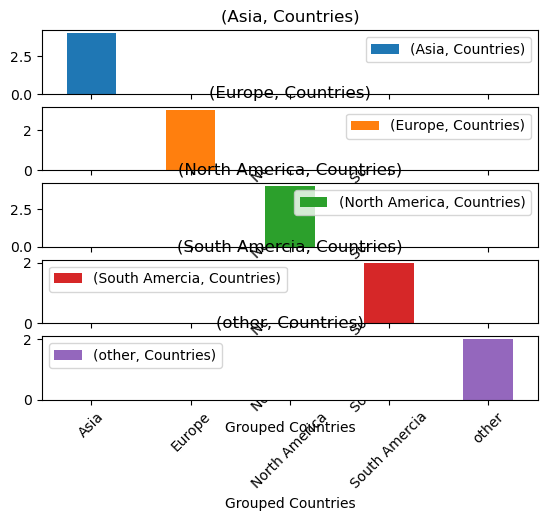

In [93]:
import matplotlib.pyplot as plt
data = df.groupby('Grouped Countries').count()
print(color.BOLD + color.PURPLE + "\ncountry by region" + color.END)
data.plot.bar(by='Grouped Countries', rot=45)

